**Predict if the Merchant is Fraudster or not for an e-commerce client**

‘XYZ’ is a large e-commerce company with its operations in several countries. As the online giant grows, so has
the number of fraudster merchants are. They deliver counterfeits or, in some cases, nothing at all. Such
schemes leave customers duped, and place both legitimate merchants and the company itself in a constant
battle to rid the marketplace of scammers. Determining this is also important in budgeting for fraud
investigation. It's a well-known problem both to the company and to merchants, which they say hasn't
effectively addressed the issue. They are serious about it and want to protect themselves from these fraudulent
merchants using technology.

# Importing Libraries and data

In [1]:
cd /kaggle/input/merchant-fraud

/kaggle/input/merchant-fraud


In [2]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

## Importing csv files

In [3]:
csv_train_1 = pd.read_csv("train_merchant_data.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])
csv_train_1.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172


In [4]:
csv_train_2 = pd.read_csv("train_order_data.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])
csv_train_2.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146


In [5]:
csv_train_3 = pd.read_csv("train.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])
csv_train_3.head()

,Merchant_ID,Fraudster
0,221592,0
1,316935,1
2,38454,1
3,214437,1
4,296240,1


## Merging CSV files

In [6]:
merged_train_data_1 = csv_train_1.merge(csv_train_2,on=["Merchant_ID"])
merged_train_data_1.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet


In [7]:
merged_train_data_2 = merged_train_data_1.merge(csv_train_3,on=["Merchant_ID"])
merged_train_data_2.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0


# EDA (Exploratory Data Analysis)

In [8]:
print(merged_train_data_1.shape)
print(merged_train_data_2.shape)

(54213, 13)
(54213, 14)


In [9]:
merged_train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ecommerce_Provider_ID       54213 non-null  int64 
 1   Merchant_ID                 54213 non-null  int64 
 2   Merchant_Registration_Date  54213 non-null  object
 3   Registered_Device_ID        54213 non-null  object
 4   Gender                      54213 non-null  object
 5   Age                         54213 non-null  int64 
 6   IP_Address                  54213 non-null  object
 7   Customer_ID                 54213 non-null  int64 
 8   Order_ID                    54213 non-null  object
 9   Date_of_Order               54213 non-null  object
 10  Order_Value_USD             54213 non-null  int64 
 11  Order_Source                54213 non-null  object
 12  Order_Payment_Method        54213 non-null  object
 13  Fraudster                   54213 non-null  in

In [10]:
merged_train_data_2.nunique()

Ecommerce_Provider_ID             1
Merchant_ID                   54213
Merchant_Registration_Date    54213
Registered_Device_ID          51291
Gender                            2
Age                              53
IP_Address                    52028
Customer_ID                   34081
Order_ID                      54213
Date_of_Order                 54161
Order_Value_USD                 116
Order_Source                      3
Order_Payment_Method              5
Fraudster                         2
dtype: int64

In [11]:
merged_train_data_2.columns

Index(['Ecommerce_Provider_ID', 'Merchant_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address', 'Customer_ID',
       'Order_ID', 'Date_of_Order', 'Order_Value_USD', 'Order_Source',
       'Order_Payment_Method', 'Fraudster'],
      dtype='object')

In [12]:
#Dropping unnecessary variables and saving into a dataframe

Ecommerce_fraud = merged_train_data_2.drop(["Merchant_ID","Customer_ID","Ecommerce_Provider_ID","Merchant_Registration_Date","Registered_Device_ID","Date_of_Order","Order_ID","IP_Address"], axis=1)

In [13]:
#Checking for null values

Ecommerce_fraud.isnull().sum()

Gender                  0
Age                     0
Order_Value_USD         0
Order_Source            0
Order_Payment_Method    0
Fraudster               0
dtype: int64

In [14]:
Ecommerce_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                54213 non-null  object
 1   Age                   54213 non-null  int64 
 2   Order_Value_USD       54213 non-null  int64 
 3   Order_Source          54213 non-null  object
 4   Order_Payment_Method  54213 non-null  object
 5   Fraudster             54213 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [15]:
Ecommerce_fraud

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,F,39,90,SEO,Debit Card,0
1,M,35,98,SEO,Internet Banking,0
2,F,40,95,SEO,Credit Card,0
3,M,37,100,Direct,E-wallet,0
4,F,27,78,SEO,E-wallet,0
...,...,...,...,...,...,...
54208,M,43,108,Ads,E-wallet,0
54209,M,41,130,Ads,Debit Card,1
54210,F,36,42,Direct,Debit Card,0
54211,M,18,82,Ads,Debit Card,0


### Dropping variables and Splitting

In [16]:
# Changing data types into categorical

Ecommerce_fraud = Ecommerce_fraud.astype({"Fraudster":"category","Gender":"category","Order_Source":"category","Order_Payment_Method":"category"})
Ecommerce_fraud.dtypes

Gender                  category
Age                        int64
Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Fraudster               category
dtype: object

In [17]:
cat_cols = ["Gender","Order_Source","Order_Payment_Method"]

In [18]:
cat_cols

['Gender', 'Order_Source', 'Order_Payment_Method']

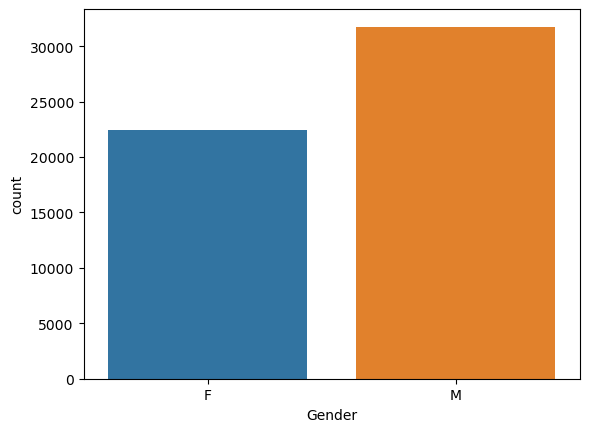

In [19]:
sns.countplot(x='Gender', data=Ecommerce_fraud)
plt.show()

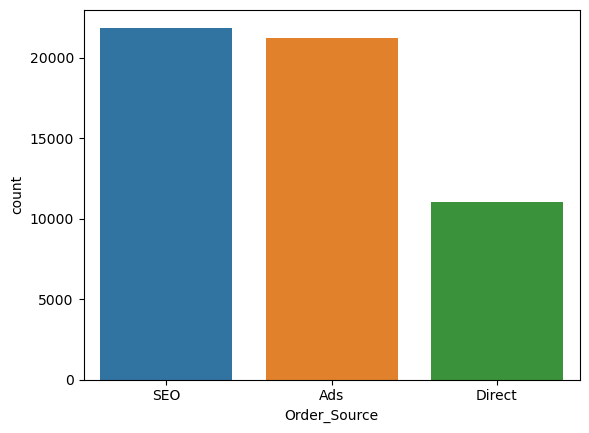

In [20]:
sns.countplot(x='Order_Source', data=Ecommerce_fraud,order=Ecommerce_fraud['Order_Source'].value_counts().index)
plt.show()

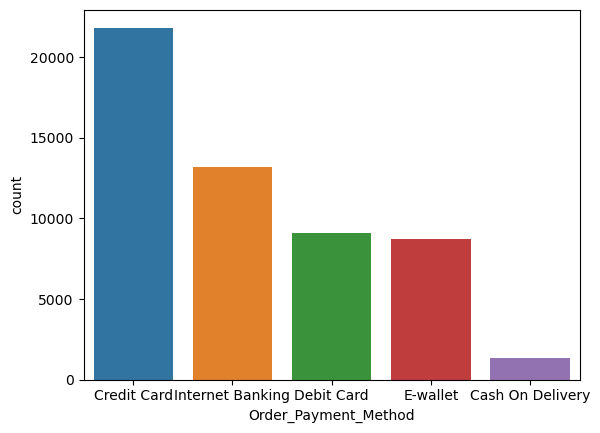

In [21]:
sns.countplot(x='Order_Payment_Method', data=Ecommerce_fraud, order=Ecommerce_fraud['Order_Payment_Method'].value_counts().index)
plt.show()

In [22]:
num_cols = ["Age","Order_Value_USD"]

In [23]:
num_cols

['Age', 'Order_Value_USD']

In [24]:
#Checking for outliers

Ecommerce_fraud[num_cols].describe()

,Age,Order_Value_USD
count,54213.000000,54213.000000
mean,33.122240,92.230240
std,8.630091,45.673263
min,18.000000,22.000000
25%,27.000000,55.000000
50%,32.000000,88.000000
75%,39.000000,122.000000
max,72.000000,385.000000


# Splitting the data into Train and Validation data

In [25]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [26]:
#Choosing target variable

X = Ecommerce_fraud.drop('Fraudster',axis=1)
y = Ecommerce_fraud['Fraudster']

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [28]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(37949, 5)
(16264, 5)
(37949,)
(16264,)


In [29]:
Ecommerce_fraud["Fraudster"].value_counts(normalize=True)

0    0.90731
1    0.09269
Name: Fraudster, dtype: float64

In [30]:
y_train.value_counts(normalize=True)

0    0.907323
1    0.092677
Name: Fraudster, dtype: float64

In [31]:
y_val.value_counts(normalize=True)

0    0.90728
1    0.09272
Name: Fraudster, dtype: float64

## Standization

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=X_train[num_cols].columns)
X_val_std = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=X_val[num_cols].columns)

In [33]:
X_train_std

,Age,Order_Value_USD
0,0.793693,-0.878904
1,0.793693,-0.922553
2,-1.409847,0.997987
3,1.953450,-0.093229
4,1.141620,-0.267823
...,...,...
37944,-0.829968,-0.486066
37945,-1.757775,0.605149
37946,1.837475,-0.224175
37947,0.793693,-0.049580


In [34]:
X_val_std

,Age,Order_Value_USD
0,-0.250089,0.168663
1,-1.061920,0.648798
2,-0.134114,1.434473
3,-0.829968,-0.529715
4,-0.482041,-0.660661
...,...,...
16259,0.793693,1.303527
16260,0.329789,-0.442418
16261,0.677717,-1.249917
16262,1.837475,0.605149


## Dummification

In [35]:
X_train_dum = pd.get_dummies((X_train[cat_cols]),drop_first=True)
X_val_dum = pd.get_dummies((X_val[cat_cols]),drop_first=True)

In [36]:
X_train_dum

,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
36314,0,0,1,0,0,0,0
24152,1,0,0,1,0,0,0
20735,1,0,1,1,0,0,0
16538,0,0,0,0,0,1,0
16452,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...
35850,1,0,0,0,0,0,0
47759,1,1,0,0,0,0,1
52371,0,0,1,0,0,1,0
6736,1,0,0,1,0,0,0


In [37]:
X_val_dum

,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
26840,1,0,1,1,0,0,0
18292,1,0,1,1,0,0,0
31373,0,0,0,1,0,0,0
2307,1,0,1,1,0,0,0
46352,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
29939,1,0,1,0,0,1,0
13586,1,0,0,0,0,0,1
32584,0,0,0,0,0,1,0
48775,1,1,0,1,0,0,0


In [38]:
X_train_std = X_train_std.reset_index()
X_train_std

,index,Age,Order_Value_USD
0,0,0.793693,-0.878904
1,1,0.793693,-0.922553
2,2,-1.409847,0.997987
3,3,1.953450,-0.093229
4,4,1.141620,-0.267823
...,...,...,...
37944,37944,-0.829968,-0.486066
37945,37945,-1.757775,0.605149
37946,37946,1.837475,-0.224175
37947,37947,0.793693,-0.049580


In [39]:
X_train_std = X_train_std.drop(["index"], axis=1)
X_train_std

,Age,Order_Value_USD
0,0.793693,-0.878904
1,0.793693,-0.922553
2,-1.409847,0.997987
3,1.953450,-0.093229
4,1.141620,-0.267823
...,...,...
37944,-0.829968,-0.486066
37945,-1.757775,0.605149
37946,1.837475,-0.224175
37947,0.793693,-0.049580


In [40]:
X_val_std = X_val_std.reset_index()
X_val_std

,index,Age,Order_Value_USD
0,0,-0.250089,0.168663
1,1,-1.061920,0.648798
2,2,-0.134114,1.434473
3,3,-0.829968,-0.529715
4,4,-0.482041,-0.660661
...,...,...,...
16259,16259,0.793693,1.303527
16260,16260,0.329789,-0.442418
16261,16261,0.677717,-1.249917
16262,16262,1.837475,0.605149


In [41]:
X_val_std = X_val_std.drop(["index"], axis=1)
X_val_std

,Age,Order_Value_USD
0,-0.250089,0.168663
1,-1.061920,0.648798
2,-0.134114,1.434473
3,-0.829968,-0.529715
4,-0.482041,-0.660661
...,...,...
16259,0.793693,1.303527
16260,0.329789,-0.442418
16261,0.677717,-1.249917
16262,1.837475,0.605149


In [42]:
X_train_dum = X_train_dum.reset_index()
X_train_dum

,index,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
0,36314,0,0,1,0,0,0,0
1,24152,1,0,0,1,0,0,0
2,20735,1,0,1,1,0,0,0
3,16538,0,0,0,0,0,1,0
4,16452,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
37944,35850,1,0,0,0,0,0,0
37945,47759,1,1,0,0,0,0,1
37946,52371,0,0,1,0,0,1,0
37947,6736,1,0,0,1,0,0,0


In [43]:
X_train_dum = X_train_dum.drop(["index"], axis=1)
X_train_dum

,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0
2,1,0,1,1,0,0,0
3,0,0,0,0,0,1,0
4,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...
37944,1,0,0,0,0,0,0
37945,1,1,0,0,0,0,1
37946,0,0,1,0,0,1,0
37947,1,0,0,1,0,0,0


In [44]:
X_val_dum = X_val_dum.reset_index()
X_val_dum

,index,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
0,26840,1,0,1,1,0,0,0
1,18292,1,0,1,1,0,0,0
2,31373,0,0,0,1,0,0,0
3,2307,1,0,1,1,0,0,0
4,46352,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
16259,29939,1,0,1,0,0,1,0
16260,13586,1,0,0,0,0,0,1
16261,32584,0,0,0,0,0,1,0
16262,48775,1,1,0,1,0,0,0


In [45]:
X_val_dum = X_val_dum.drop(["index"], axis=1)
X_val_dum

,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
0,1,0,1,1,0,0,0
1,1,0,1,1,0,0,0
2,0,0,0,1,0,0,0
3,1,0,1,1,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
16259,1,0,1,0,0,1,0
16260,1,0,0,0,0,0,1
16261,0,0,0,0,0,1,0
16262,1,1,0,1,0,0,0


## Concating Train and validation data

In [46]:
final_X_train = pd.concat([X_train_std, X_train_dum], axis=1)

In [47]:
final_X_val = pd.concat([X_val_std, X_val_dum], axis=1)

In [48]:
final_X_train.isnull().sum()

Age                                      0
Order_Value_USD                          0
Gender_M                                 0
Order_Source_Direct                      0
Order_Source_SEO                         0
Order_Payment_Method_Credit Card         0
Order_Payment_Method_Debit Card          0
Order_Payment_Method_E-wallet            0
Order_Payment_Method_Internet Banking    0
dtype: int64

In [49]:
final_X_val.isnull().sum()

Age                                      0
Order_Value_USD                          0
Gender_M                                 0
Order_Source_Direct                      0
Order_Source_SEO                         0
Order_Payment_Method_Credit Card         0
Order_Payment_Method_Debit Card          0
Order_Payment_Method_E-wallet            0
Order_Payment_Method_Internet Banking    0
dtype: int64

# Model Building
## Decision Tree

In [50]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [51]:
dt = tree.DecisionTreeClassifier()

In [52]:
# Define hyperparameter space
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search CV
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(final_X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 6, 10],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [53]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score: 0.9075601448667727


In [54]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth= 7, max_features= 'log2', min_samples_leaf=2, min_samples_split=40)
dt = dt.fit(final_X_train, y_train)

In [55]:
dt_y_train_preds = dt.predict(final_X_train)
dt_y_train_preds[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
dt_y_val_preds = dt.predict(final_X_val)
dt_y_val_preds[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
confusionmatrix = confusion_matrix(y_train, dt_y_train_preds)
class_report_train = classification_report(y_train, dt_y_train_preds)
confusionmatrix

array([[34426,     6],
       [ 3503,    14]])

In [58]:
print(class_report_train)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     34432
           1       0.70      0.00      0.01      3517

    accuracy                           0.91     37949
   macro avg       0.80      0.50      0.48     37949
weighted avg       0.89      0.91      0.86     37949



In [59]:
confusionmatrix = confusion_matrix(y_val, dt_y_val_preds)
class_report_val = classification_report(y_val ,dt_y_val_preds)
confusionmatrix

array([[14750,     6],
       [ 1503,     5]])

In [60]:
print(class_report_val)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     14756
           1       0.45      0.00      0.01      1508

    accuracy                           0.91     16264
   macro avg       0.68      0.50      0.48     16264
weighted avg       0.87      0.91      0.86     16264



# K-Nearest Neighbours

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [62]:
param_grid = {
    'n_neighbors': [3, 5, 11, 17, 19, 21],
    'weights': ['uniform', 'distance']
}

In [63]:
# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(final_X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 21, 'weights': 'distance'}
Best score: 0.9141479198708484


In [64]:
knn = KNeighborsClassifier(n_neighbors= 21, weights='distance')
knn = knn.fit(final_X_train, y_train)

In [65]:
y_train_preds = knn.predict(final_X_train)
y_train_preds[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [66]:
y_val_preds = knn.predict(final_X_val)
y_val_preds[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
confusionmatrix = confusion_matrix(y_train,y_train_preds)
class_report_train = classification_report(y_train,y_train_preds)
confusionmatrix

array([[34078,   354],
       [ 1161,  2356]])

In [68]:
print(class_report_train)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     34432
           1       0.87      0.67      0.76      3517

    accuracy                           0.96     37949
   macro avg       0.92      0.83      0.87     37949
weighted avg       0.96      0.96      0.96     37949



In [69]:
confusionmatrix = confusion_matrix(y_val,y_val_preds)
class_report_val = classification_report(y_val,y_val_preds)
confusionmatrix

array([[14315,   441],
       [  969,   539]])

In [70]:
print(class_report_val)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14756
           1       0.55      0.36      0.43      1508

    accuracy                           0.91     16264
   macro avg       0.74      0.66      0.69     16264
weighted avg       0.90      0.91      0.90     16264



# Importing the test data

In [71]:
csv_test_1 = pd.read_csv("test_merchant_data.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])
csv_test_1.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47


In [72]:
csv_test_2 = pd.read_csv("test_order_data.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])
csv_test_2.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706


In [73]:
csv_test_3 = pd.read_csv("test.csv",na_values=['.',':','?','!','@','#','$','%','^','&','*',','])
csv_test_3.head()

,Merchant_ID
0,53637
1,243517
2,343640
3,69889
4,125706


In [74]:
merged_test_data_1 = csv_test_1.merge(csv_test_2,on=["Merchant_ID"])
merged_test_data_1.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card


In [75]:
merged_test_data_2 =merged_test_data_1.merge(csv_test_3,on=["Merchant_ID"])
merged_test_data_2.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card


## EDA on Test data

In [76]:
print(merged_test_data_1.shape)
print(merged_test_data_2.shape)

(13554, 13)
(13554, 13)


In [77]:
merged_test_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 13553
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ecommerce_Provider_ID       13554 non-null  int64 
 1   Merchant_ID                 13554 non-null  int64 
 2   Merchant_Registration_Date  13554 non-null  object
 3   Registered_Device_ID        13554 non-null  object
 4   Gender                      13554 non-null  object
 5   Age                         13554 non-null  int64 
 6   IP_Address                  13554 non-null  object
 7   Customer_ID                 13554 non-null  int64 
 8   Order_ID                    13554 non-null  object
 9   Date_of_Order               13554 non-null  object
 10  Order_Value_USD             13554 non-null  int64 
 11  Order_Source                13554 non-null  object
 12  Order_Payment_Method        13554 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.4+ MB


In [78]:
merged_test_data_2.nunique()

Ecommerce_Provider_ID             1
Merchant_ID                   13554
Merchant_Registration_Date    13554
Registered_Device_ID          13213
Gender                            2
Age                              51
IP_Address                    13251
Customer_ID                   11975
Order_ID                      13554
Date_of_Order                 13548
Order_Value_USD                 105
Order_Source                      3
Order_Payment_Method              5
dtype: int64

In [79]:
merged_test_data_2.columns

Index(['Ecommerce_Provider_ID', 'Merchant_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address', 'Customer_ID',
       'Order_ID', 'Date_of_Order', 'Order_Value_USD', 'Order_Source',
       'Order_Payment_Method'],
      dtype='object')

In [80]:
label = merged_test_data_2.filter(["Merchant_ID"], axis=1)
label

,Merchant_ID
0,53637
1,243517
2,343640
3,69889
4,125706
...,...
13549,279884
13550,206253
13551,313049
13552,304081


In [81]:
Ecommerce_fraud_test = merged_test_data_2.drop(["Merchant_ID","Customer_ID","Ecommerce_Provider_ID","Merchant_Registration_Date","Registered_Device_ID","Date_of_Order","Order_ID","IP_Address"], axis=1)

In [82]:
Ecommerce_fraud_test.isnull().sum()

Gender                  0
Age                     0
Order_Value_USD         0
Order_Source            0
Order_Payment_Method    0
dtype: int64

In [83]:
Ecommerce_fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 13553
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                13554 non-null  object
 1   Age                   13554 non-null  int64 
 2   Order_Value_USD       13554 non-null  int64 
 3   Order_Source          13554 non-null  object
 4   Order_Payment_Method  13554 non-null  object
dtypes: int64(2), object(3)
memory usage: 635.3+ KB


## Standardization of test data

In [84]:
test_data_std = pd.DataFrame(scaler.transform(Ecommerce_fraud_test[num_cols]), columns=Ecommerce_fraud_test[num_cols].columns)
test_data_std

,Age,Order_Value_USD
0,0.793693,-0.704309
1,0.677717,-1.402687
2,-1.177896,-0.376945
3,0.097838,0.125014
4,-1.525823,-1.249917
...,...,...
13549,-1.525823,-0.005932
13550,-0.366065,0.779744
13551,1.257596,0.125014
13552,0.677717,-0.529715


### Dummification of test data

In [85]:
test_data_dum = pd.get_dummies((Ecommerce_fraud_test[cat_cols]), drop_first=True)
test_data_dum

,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
0,0,0,1,1,0,0,0
1,1,0,1,1,0,0,0
2,1,0,0,0,1,0,0
3,1,0,1,1,0,0,0
4,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...
13549,1,0,1,1,0,0,0
13550,0,0,1,0,0,0,1
13551,0,1,0,0,0,1,0
13552,0,0,1,0,1,0,0


In [86]:
test_data_std = test_data_std.reset_index()
test_data_std

,index,Age,Order_Value_USD
0,0,0.793693,-0.704309
1,1,0.677717,-1.402687
2,2,-1.177896,-0.376945
3,3,0.097838,0.125014
4,4,-1.525823,-1.249917
...,...,...,...
13549,13549,-1.525823,-0.005932
13550,13550,-0.366065,0.779744
13551,13551,1.257596,0.125014
13552,13552,0.677717,-0.529715


In [87]:
test_data_std = test_data_std.drop(["index"], axis=1)
test_data_std

,Age,Order_Value_USD
0,0.793693,-0.704309
1,0.677717,-1.402687
2,-1.177896,-0.376945
3,0.097838,0.125014
4,-1.525823,-1.249917
...,...,...
13549,-1.525823,-0.005932
13550,-0.366065,0.779744
13551,1.257596,0.125014
13552,0.677717,-0.529715


In [88]:
test_data_dum = test_data_dum.reset_index()
test_data_std

,Age,Order_Value_USD
0,0.793693,-0.704309
1,0.677717,-1.402687
2,-1.177896,-0.376945
3,0.097838,0.125014
4,-1.525823,-1.249917
...,...,...
13549,-1.525823,-0.005932
13550,-0.366065,0.779744
13551,1.257596,0.125014
13552,0.677717,-0.529715


In [89]:
test_data_dum = test_data_dum.drop(["index"], axis=1)
test_data_dum

,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
0,0,0,1,1,0,0,0
1,1,0,1,1,0,0,0
2,1,0,0,0,1,0,0
3,1,0,1,1,0,0,0
4,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...
13549,1,0,1,1,0,0,0
13550,0,0,1,0,0,0,1
13551,0,1,0,0,0,1,0
13552,0,0,1,0,1,0,0


### Concating test data

In [90]:
Final_test_df = pd.concat([test_data_std,test_data_dum], axis=1)
Final_test_df

,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
0,0.793693,-0.704309,0,0,1,1,0,0,0
1,0.677717,-1.402687,1,0,1,1,0,0,0
2,-1.177896,-0.376945,1,0,0,0,1,0,0
3,0.097838,0.125014,1,0,1,1,0,0,0
4,-1.525823,-1.249917,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
13549,-1.525823,-0.005932,1,0,1,1,0,0,0
13550,-0.366065,0.779744,0,0,1,0,0,0,1
13551,1.257596,0.125014,0,1,0,0,0,1,0
13552,0.677717,-0.529715,0,0,1,0,1,0,0


In [91]:
Final_test_df.isnull().sum()

Age                                      0
Order_Value_USD                          0
Gender_M                                 0
Order_Source_Direct                      0
Order_Source_SEO                         0
Order_Payment_Method_Credit Card         0
Order_Payment_Method_Debit Card          0
Order_Payment_Method_E-wallet            0
Order_Payment_Method_Internet Banking    0
dtype: int64

#### Applying the best model of train data on test data

In [92]:
test_preds = knn.predict(Final_test_df)
test_preds[0:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [93]:
len(test_preds)

13554

In [94]:
label["Fraudster"] = test_preds
label["Fraudster"][0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: Fraudster, dtype: int64

In [95]:
label

,Merchant_ID,Fraudster
0,53637,0
1,243517,0
2,343640,0
3,69889,0
4,125706,0
...,...,...
13549,279884,0
13550,206253,0
13551,313049,0
13552,304081,0


In [96]:
label = label.set_index(["Merchant_ID"])
label

,Fraudster
Merchant_ID,
53637,0
243517,0
343640,0
69889,0
125706,0
...,...
279884,0
206253,0
313049,0


#### Exporting to CSV

In [97]:
label.to_csv('/kaggle/working/submission.csv')

In [98]:
import os
os.getcwd()

'/kaggle/input/merchant-fraud'